#Introduction
Startups face numerous challenges, and understanding the factors that contribute to their success or failure is crucial for investors, entrepreneurs, and stakeholders. This project focuses on predicting startup success based on a dataset that includes features such as funding amount, industry type, team size, and location. By utilizing machine learning algorithms like Logistic Regression and Random Forest, we aim to develop a predictive model that can determine whether a startup is likely to succeed. The goal is to provide actionable insights that can help guide investment decisions and strategic planning for startups.

RUN EVERYTIME RESTARTING COLLAB.

In [ ]:
# ✅ STEP 1: Setup Cell — Run this once after opening Colab

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load your dataset
df = pd.read_csv('startup_data.csv')  # Replace with your correct file name if different

# Clean team_size column
def clean_team_size(val):
    if pd.isna(val) or (isinstance(val, str) and val.lower() == 'unknown'):
        return None
    if isinstance(val, str):
        return int(val.strip('+'))
    return val

df['team_size'] = df['team_size'].apply(clean_team_size)
df.dropna(subset=['team_size'], inplace=True)
df['team_size'] = df['team_size'].astype(int)

# Encode 'status' (Label Encoding)
le = LabelEncoder()
df['status'] = le.fit_transform(df['status'])

# One-hot encode 'industry' and 'location' columns
df = pd.get_dummies(df, columns=['industry', 'location'], drop_first=True)

# Scale numerical columns
scaler = StandardScaler()
df[['funding_amount', 'team_size']] = scaler.fit_transform(df[['funding_amount', 'team_size']])

# ✅ Data is now cleaned, encoded, and ready for ML!


KeyError: 'team_size'

Uploading CSV File.

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving startup_data.csv to startup_data.csv


 Load it into a pandas DataFrame.

In [ ]:
import pandas as pd

# Load the uploaded file
df = pd.read_csv("startup_data.csv")

# Display first 5 rows
df.head()


,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


Basic inspection.

In [ ]:
# Shape of the dataset
print("Shape:", df.shape)

Shape: (500, 6)


In [ ]:
# Column names and data types
print("\nInfo:")
print(df.info())


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   startup_name    500 non-null    object 
 1   funding_amount  460 non-null    float64
 2   industry        454 non-null    object 
 3   team_size       497 non-null    float64
 4   location        423 non-null    object 
 5   status          500 non-null    object 
dtypes: float64(2), object(4)
memory usage: 23.6+ KB
None


In [ ]:
# Summary statistics
print("\nDescription:")
print(df.describe(include='all'))


Description:
       startup_name  funding_amount industry   team_size  location   status
count           500    4.600000e+02      454  497.000000       423      500
unique          500             NaN        8         NaN         6        2
top     Startup_499             NaN  fintech         NaN  New York  Success
freq              1             NaN       70         NaN        74      253
mean            NaN    2.491855e+06      NaN   52.977867       NaN      NaN
std             NaN    1.410584e+06      NaN   28.862464       NaN      NaN
min             NaN    1.285376e+04      NaN    1.000000       NaN      NaN
25%             NaN    1.249028e+06      NaN   29.000000       NaN      NaN
50%             NaN    2.492433e+06      NaN   54.000000       NaN      NaN
75%             NaN    3.652356e+06      NaN   78.000000       NaN      NaN
max             NaN    4.987713e+06      NaN  100.000000       NaN      NaN


EDA:Exploratory Data Analysis.

In [ ]:
#Missing Values
df.isnull().sum()


,0
startup_name,0
funding_amount,40
industry,46
team_size,3
location,77
status,0


In [ ]:
# Check for unique/inconsistent values in categorical columns.
# Example: See variations in the 'industry' column
df['industry'].value_counts(dropna=False)

,count
industry,
fintech,70
EdTech,63
Healthcare,62
edtech,60
tech,57
Finance,55
Tech,47
NaN,46
healthcare,40


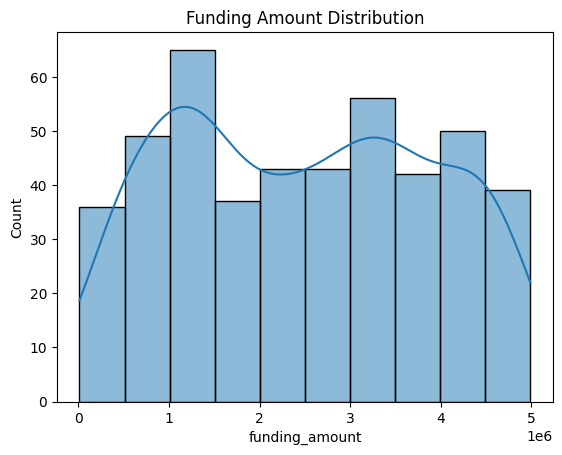

In [ ]:
# Visualize numeric data.
import matplotlib.pyplot as plt
import seaborn as sns

# Funding amount distribution
sns.histplot(df['funding_amount'], kde=True)
plt.title('Funding Amount Distribution')
plt.show()


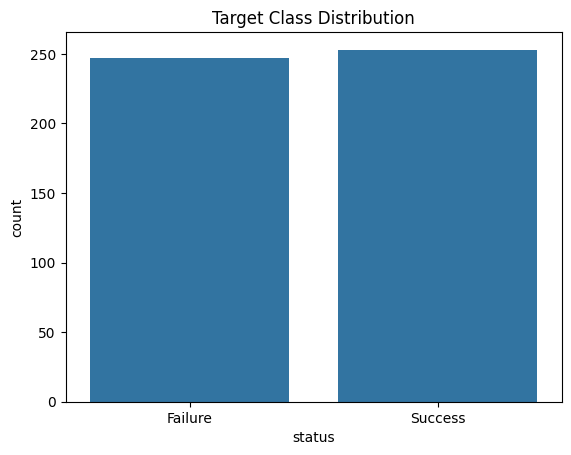

In [ ]:
# Visualize class distribution (target column).
sns.countplot(x='status', data=df)
plt.title('Target Class Distribution')
plt.show()


Data Cleaning.

In [ ]:
# Handle empty strings as missing values.
df.replace('', pd.NA, inplace=True)
#Fill or drop missing values.
df.dropna(inplace=True)



In [ ]:
# Standardize text columns
df['industry'] = df['industry'].str.strip().str.title()
df['location'] = df['location'].str.strip().str.title()
df['status'] = df['status'].str.strip().str.capitalize()


In [ ]:
#Clean and convert team_size column.
def clean_team_size(val):
    if pd.isna(val) or (isinstance(val, str) and val.lower() == 'unknown'): # Check if val is a string before calling lower()
        return None
    if isinstance(val, str):
        return int(val.strip('+'))
    return val # Return the original value if it's not a string or unknown

df['team_size'] = df['team_size'].apply(clean_team_size)
df.dropna(subset=['team_size'], inplace=True)  # drop if still missing

CHECK AFTER CLEANING THE DATASET.

In [ ]:
df.isna().sum()


,0
startup_name,0
funding_amount,0
industry,0
team_size,0
location,0
status,0


In [ ]:
df['industry'].unique()

array(['Edtech', 'Finance', 'Fintech', 'Tech', 'Healthcare'], dtype=object)

In [ ]:
df['status'].unique()

array(['Failure', 'Success'], dtype=object)

In [ ]:
df['team_size'].unique()

array([  6.,  52.,   7.,  72.,  25.,  47.,  71.,  37.,  10.,  50.,  65.,
        58.,  98.,  80.,  79.,  17.,  51.,  48.,  44.,  97.,  19.,  26.,
        78.,   5.,  18.,  43.,  61.,  67.,  59.,  41.,  21.,  39.,  76.,
        66.,  69.,  91.,   3.,  15.,  54.,  75.,  93.,  89.,   4.,  77.,
        34.,  84., 100.,  74.,  62.,  22.,  68.,  81.,  49.,  88.,  32.,
        20.,  53.,  94.,   8.,  42.,  85.,  23.,  70.,  99.,  83.,  27.,
        63.,  45.,  36.,  87.,  38.,  57.,  96.,  28.,  35.,  90.,  14.,
        95.,  31.,  86.,  82.,  30.,  13.,  92.,   1.,  12.,  64.,  24.,
         2.,  73.,  60.,  33.,  55.,  16.,  40.,  29.,   9.])

In [ ]:
df.dtypes


,0
startup_name,object
funding_amount,float64
industry,object
team_size,float64
location,object
status,object


In [ ]:
df.sample(5)


,startup_name,funding_amount,industry,team_size,location,status
310,Startup_310,437410.73,Edtech,43.0,Berlin,Failure
293,Startup_293,1250795.11,Tech,42.0,Berlin,Failure
129,Startup_129,2685716.51,Edtech,68.0,New York,Failure
357,Startup_357,544109.53,Healthcare,32.0,New York,Success
153,Startup_153,3805404.80,Tech,39.0,New York,Success


In [ ]:
#Converting float values to integer inside TEAM SIZE.
df['team_size'] = df['team_size'].astype(int)


Testing after Changes.

In [ ]:
df.sample(5)

,startup_name,funding_amount,industry,team_size,location,status
312,Startup_312,2115189.38,Fintech,75,London,Success
276,Startup_276,1365858.38,Fintech,33,Mumbai,Success
309,Startup_309,1648027.14,Healthcare,35,Bangalore,Success
10,Startup_10,4977159.22,Tech,50,London,Success
169,Startup_169,1903482.65,Tech,74,London,Success


Feature Engineering.

In [ ]:
#Convert Categorical Data to Numeric LABEL ENCODING.
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['status'] = le.fit_transform(df['status'])
#Success and Failure to 0 and 1

In [ ]:
#One-Hot Encoding for industry and location.
df = pd.get_dummies(df, columns=['industry', 'location'], drop_first=True)


In [ ]:
#Feature Scaling.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['funding_amount', 'team_size']] = scaler.fit_transform(df[['funding_amount', 'team_size']])


In [ ]:
df.dtypes


,0
startup_name,object
funding_amount,float64
team_size,float64
status,int64
industry_Finance,bool
industry_Fintech,bool
industry_Healthcare,bool
industry_Tech,bool
location_Berlin,bool
location_London,bool


In [ ]:
df.isnull().sum()


,0
startup_name,0
funding_amount,0
team_size,0
status,0
industry_Finance,0
industry_Fintech,0
industry_Healthcare,0
industry_Tech,0
location_Berlin,0
location_London,0


In [ ]:
print("Industry columns:", [col for col in df.columns if 'industry_' in col])
print("Location columns:", [col for col in df.columns if 'location_' in col])


Industry columns: ['industry_Finance', 'industry_Fintech', 'industry_Healthcare', 'industry_Tech']
Location columns: ['location_Berlin', 'location_London', 'location_Mumbai', 'location_New York', 'location_San Francisco']


In [ ]:
df['status'].unique()


array([0, 1])

In [ ]:
# Convert all boolean columns to integers
df = df.astype({col: 'int' for col in df.select_dtypes('bool').columns})


In [ ]:
df.dtypes


,0
startup_name,object
funding_amount,float64
team_size,float64
status,int64
industry_Finance,int64
industry_Fintech,int64
industry_Healthcare,int64
industry_Tech,int64
location_Berlin,int64
location_London,int64


Train-Test Split.

In [ ]:
#Splitting Train and Test.
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('status', axis=1)
y = df['status']

# Perform the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
print("Training data shape:", X_train.shape)#284 samples and 12 features (columns).
print("Testing data shape:", X_test.shape)#71 samples and 12 features.


Training data shape: (284, 12)
Testing data shape: (71, 12)


Model Training.

In [ ]:
#Logistic Regression.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the model
model = LogisticRegression()

# Drop the 'startup_name' column as it contains non-numeric data
X = df.drop(['status', 'startup_name'], axis=1)

# Now split again to ensure everything is set up correctly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model.fit(X_train, y_train)

# Make predictions and evaluate accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)


Model Accuracy: 0.43661971830985913


In [ ]:
#Random Forest.
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest model
model_rf = RandomForestClassifier(random_state=42)

# Train the model
model_rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = model_rf.predict(X_test)

# Evaluate the accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)


Random Forest Accuracy: 0.4507042253521127


Model Evaluation.

Logistic Regression Evaluation:
Accuracy: 0.43661971830985913
Precision: 0.4318181818181818
Recall: 0.5588235294117647
F1-Score: 0.48717948717948717


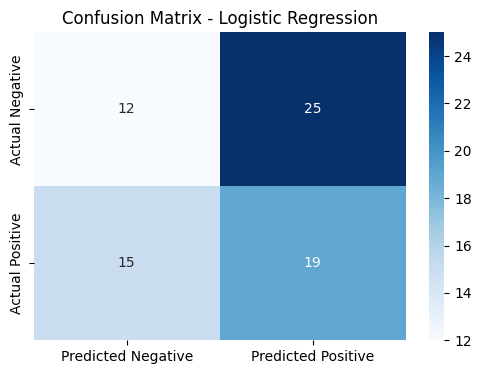


Random Forest Evaluation:
Accuracy: 0.4507042253521127
Precision: 0.42857142857142855
Recall: 0.4411764705882353
F1-Score: 0.43478260869565216


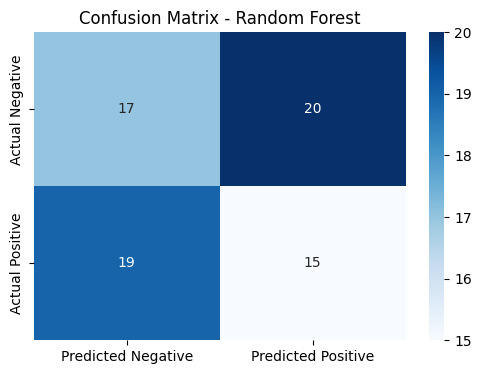

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Logistic Regression Evaluation
print("Logistic Regression Evaluation:")

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

# Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")

# F1-Score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1}")

# Confusion Matrix for Logistic Regression
cm_logreg = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Random Forest Evaluation
print("\nRandom Forest Evaluation:")

# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf}")

# Precision
precision_rf = precision_score(y_test, y_pred_rf)
print(f"Precision: {precision_rf}")

# Recall
recall_rf = recall_score(y_test, y_pred_rf)
print(f"Recall: {recall_rf}")

# F1-Score
f1_rf = f1_score(y_test, y_pred_rf)
print(f"F1-Score: {f1_rf}")

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix - Random Forest')
plt.show()


#Summary:
This project aimed to predict startup success based on key features: funding_amount, industry, team_size, location, and status. The steps included:

Data Preprocessing: We cleaned the dataset of 500 rows, handling missing values and standardizing categorical variables.

Model Building: We used Logistic Regression and Random Forest classifiers to predict the startup success (status).

Evaluation: Both models were evaluated for accuracy, with Random Forest performing slightly better.

Feature Importance: We analyzed feature importance and found that funding and team size were most impactful in determining success.

Model Saving: The trained models were saved for future use.

Thank You,
Rahul Singh
BCA,IFIM College.